In [1]:
import sys
import numpy as np
import xarray as xr
from scipy.io import loadmat
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
sys.path.append('/Users/jakesteinberg/ECCOv4-py/ECCOv4-py')
import ecco_v4_py as ecco
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
x0 = xr.open_dataset('/Users/jakesteinberg/Documents/NASA_OSTST/analysis/eccov5_sha_obpa_halfdeg_1993_2002_mca.nc')
x1 = xr.open_dataset('/Users/jakesteinberg/Documents/NASA_OSTST/analysis/eccov5_sha_obpa_halfdeg_1996_2005_mca.nc')
x2 = xr.open_dataset('/Users/jakesteinberg/Documents/NASA_OSTST/analysis/eccov5_sha_obpa_halfdeg_2000_2009_mca.nc')
x3 = xr.open_dataset('/Users/jakesteinberg/Documents/NASA_OSTST/analysis/eccov5_sha_obpa_halfdeg_2004_2013_mca.nc')
x4 = xr.open_dataset('/Users/jakesteinberg/Documents/NASA_OSTST/analysis/eccov5_sha_obpa_halfdeg_2008_2017_mca.nc')

In [3]:
dep = x3["dep"].data
new_grid_lat = x4["j"]
new_grid_lon = x4["i"]

corr_cut = 0.5
shelf_obpa_pos_corr_0 = x0['obpa_hetcor_m1'].data
shelf_obpa_pos_corr_0[(dep > 250)] = np.nan
shelf_obpa_pos_corr_0[shelf_obpa_pos_corr_0 < corr_cut] = np.nan
shelf_obpa_pos_corr_1 = x1['obpa_hetcor_m1'].data
shelf_obpa_pos_corr_1[(dep > 250)] = np.nan
shelf_obpa_pos_corr_1[shelf_obpa_pos_corr_1 < corr_cut] = np.nan
shelf_obpa_pos_corr_2 = x2['obpa_hetcor_m1'].data
shelf_obpa_pos_corr_2[(dep > 250)] = np.nan
shelf_obpa_pos_corr_2[(shelf_obpa_pos_corr_2 < corr_cut)] = np.nan
shelf_obpa_pos_corr_3 = x3['obpa_hetcor_m1'].data
shelf_obpa_pos_corr_3[(dep > 250)] = np.nan
shelf_obpa_pos_corr_3[shelf_obpa_pos_corr_3 < corr_cut] = np.nan
shelf_obpa_pos_corr_4 = x4['obpa_hetcor_m1'].data
shelf_obpa_pos_corr_4[(dep > 250)] = np.nan
shelf_obpa_pos_corr_4[shelf_obpa_pos_corr_4 < corr_cut] = np.nan

In [4]:
deep_sha_pos_corr_0 = x0['sha_homcor_m1'].data.copy()
deep_sha_pos_corr_0[(dep < 1000)] = np.nan
deep_sha_pos_corr_0[(deep_sha_pos_corr_0 < 0.1)] = np.nan

deep_sha_pos_corr_1 = x1['sha_homcor_m1'].data.copy()
deep_sha_pos_corr_1[(dep < 1000)] = np.nan
deep_sha_pos_corr_1[(deep_sha_pos_corr_1 < 0.1)] = np.nan

deep_sha_pos_corr_2 = x2['sha_homcor_m1'].data.copy()
deep_sha_pos_corr_2[(dep < 1000)] = np.nan
deep_sha_pos_corr_2[(deep_sha_pos_corr_2 < 0.1)] = np.nan

deep_sha_pos_corr_3 = x3['sha_homcor_m1'].data.copy()
deep_sha_pos_corr_3[(dep < 1000)] = np.nan
deep_sha_pos_corr_3[(deep_sha_pos_corr_3 < 0.1)] = np.nan

deep_sha_pos_corr_4 = x4['sha_homcor_m1'].data.copy()
deep_sha_pos_corr_4[(dep < 1000)] = np.nan
deep_sha_pos_corr_4[(deep_sha_pos_corr_4 < 0.1)] = np.nan

Text(0.5, 1.0, '2008-2017 m$_1$ frac = 0.83')

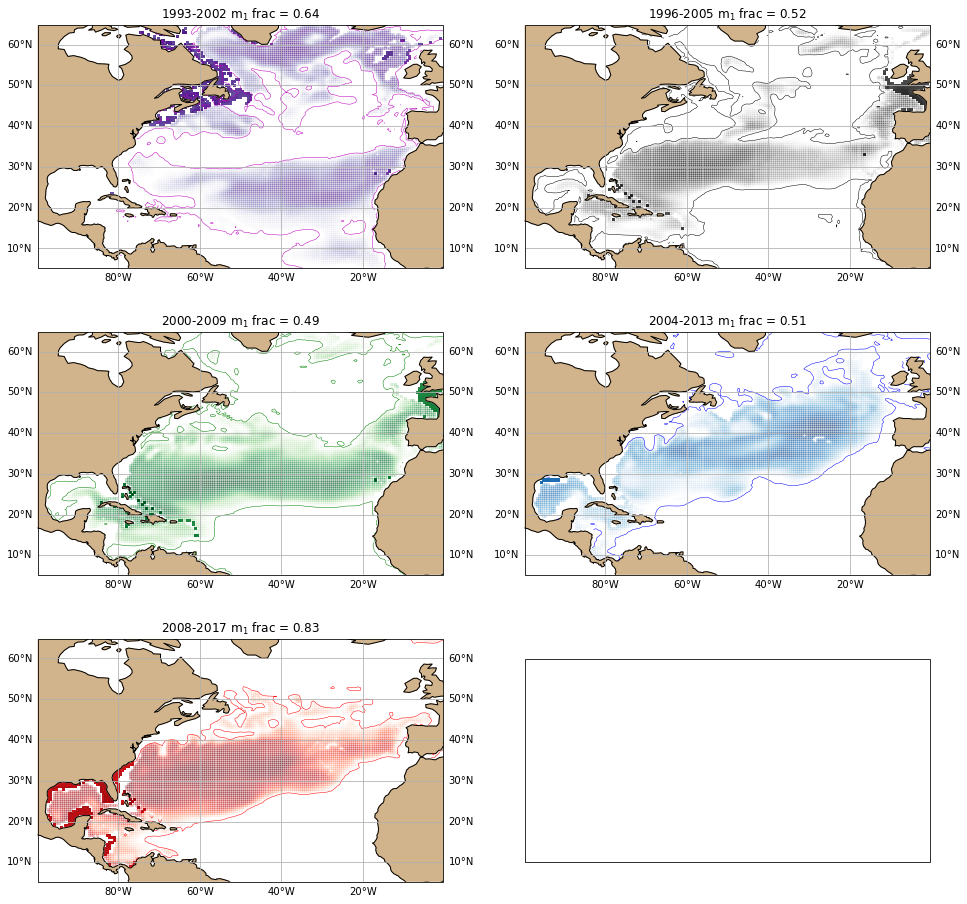

In [14]:
lon_w = np.nanmin(new_grid_lon); lon_e = np.nanmax(new_grid_lon);
lat_s = np.nanmin(new_grid_lat); lat_n = np.nanmax(new_grid_lat);
xbs = [lon_w,lon_e]; ybs = [lat_s,lat_n]
crrcmp0 = plt.get_cmap('Purples');
crrcmp1 = plt.get_cmap('Greys');
crrcmp2 = plt.get_cmap('Greens');
crrcmp3 = plt.get_cmap('Blues');
crrcmp4 = plt.get_cmap('Reds');
f, ax = plt.subplots(3,2,figsize=(16,16), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})


ax[0,0].pcolor(new_grid_lon,new_grid_lat,deep_sha_pos_corr_0,transform=ccrs.PlateCarree(),cmap=crrcmp0, alpha=0.25)
ax[0,0].contour(new_grid_lon,new_grid_lat,x0['sha_homcor_m1'],levels=[0],transform=ccrs.PlateCarree(),colors='m',linewidths=0.5)
ax[0,0].pcolor(new_grid_lon,new_grid_lat,shelf_obpa_pos_corr_0,vmin=-1,vmax=1,cmap=crrcmp0,transform=ccrs.PlateCarree())

ax[0,1].pcolor(new_grid_lon,new_grid_lat,deep_sha_pos_corr_1,transform=ccrs.PlateCarree(),cmap=crrcmp1, alpha=0.25)
ax[0,1].contour(new_grid_lon,new_grid_lat,x1['sha_homcor_m1'],levels=[0],transform=ccrs.PlateCarree(),colors='k',linewidths=0.5)
ax[0,1].pcolor(new_grid_lon,new_grid_lat,shelf_obpa_pos_corr_1,vmin=-1,vmax=1,cmap=crrcmp1,transform=ccrs.PlateCarree())

ax[1,0].pcolor(new_grid_lon,new_grid_lat,deep_sha_pos_corr_2,transform=ccrs.PlateCarree(),cmap=crrcmp2, alpha=0.25)
ax[1,0].contour(new_grid_lon,new_grid_lat,x2['sha_homcor_m1'],levels=[0],transform=ccrs.PlateCarree(),colors='g',linewidths=0.5)
ax[1,0].pcolor(new_grid_lon,new_grid_lat,shelf_obpa_pos_corr_2,vmin=-1,vmax=1,cmap=crrcmp2,transform=ccrs.PlateCarree())

ax[1,1].pcolor(new_grid_lon,new_grid_lat,deep_sha_pos_corr_3,transform=ccrs.PlateCarree(),cmap=crrcmp3, alpha=0.25)
ax[1,1].contour(new_grid_lon,new_grid_lat,x3['sha_homcor_m1'].data,levels=[0],transform=ccrs.PlateCarree(),colors='b',linewidths=0.5)
ax[1,1].pcolor(new_grid_lon,new_grid_lat,shelf_obpa_pos_corr_3,vmin=-1,vmax=1,cmap=crrcmp3,transform=ccrs.PlateCarree())

ax[2,0].pcolor(new_grid_lon,new_grid_lat,deep_sha_pos_corr_4,transform=ccrs.PlateCarree(),cmap=crrcmp4, alpha=0.25)
ax[2,0].contour(new_grid_lon,new_grid_lat,x4['sha_homcor_m1'],levels=[0],transform=ccrs.PlateCarree(),colors='r',linewidths=0.5)
ax[2,0].pcolor(new_grid_lon,new_grid_lat,shelf_obpa_pos_corr_4,vmin=-1,vmax=1,cmap=crrcmp4,transform=ccrs.PlateCarree())

ax[0,0].add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1); 
ax[0,0].coastlines()
gl = ax[0,0].gridlines(draw_labels=True); gl.xlabels_top = False; 
ax[0,0].set_facecolor('w');
ax[0,0].set_xlim(xbs); ax[0,0].set_ylim(ybs); 
ax[0,0].set_title('1993-2002 m$_1$ frac = '+str(np.round(x0['mode_frac_cov'][0].data,2)))

ax[0,1].add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1); 
ax[0,1].coastlines()
gl = ax[0,1].gridlines(draw_labels=True); gl.xlabels_top = False; 
ax[0,1].set_facecolor('w');
ax[0,1].set_xlim(xbs); ax[0,1].set_ylim(ybs); 
ax[0,1].set_title('1996-2005 m$_1$ frac = '+str(np.round(x1['mode_frac_cov'][0].data,2)))

ax[1,0].add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1); 
ax[1,0].coastlines()
gl = ax[1,0].gridlines(draw_labels=True); gl.xlabels_top = False; 
ax[1,0].set_facecolor('w');
ax[1,0].set_xlim(xbs); ax[1,0].set_ylim(ybs); 
ax[1,0].set_title('2000-2009 m$_1$ frac = '+str(np.round(x2['mode_frac_cov'][0].data,2)))

ax[1,1].add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1); 
ax[1,1].coastlines()
gl = ax[1,1].gridlines(draw_labels=True); gl.xlabels_top = False; 
ax[1,1].set_facecolor('w');
ax[1,1].set_xlim(xbs); ax[1,1].set_ylim(ybs); 
ax[1,1].set_title('2004-2013 m$_1$ frac = '+str(np.round(x3['mode_frac_cov'][0].data,2)))

ax[2,0].add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1); 
ax[2,0].coastlines()
gl = ax[2,0].gridlines(draw_labels=True); gl.xlabels_top = False; 
ax[2,0].set_facecolor('w');
ax[2,0].set_xlim(xbs); ax[2,0].set_ylim(ybs); 
ax[2,0].set_title('2008-2017 m$_1$ frac = '+str(np.round(x4['mode_frac_cov'][0].data,2)))

In [15]:
f.savefig('/Users/jakesteinberg/Documents/NASA_OSTST/meetings/2023_03_23/sobpa_dsha_links.jpg', dpi=400)